<h3>Inicialização</h3>

In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import cv2
import numpy as np
from matplotlib import pyplot as plt


<h3>Técnicas de meio-tons</h3>

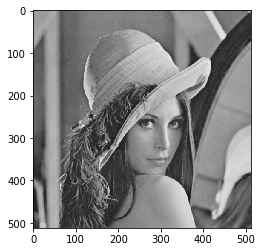

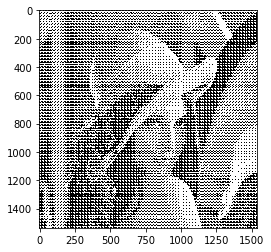

In [3]:
#Meios-tons ordenado
img = cv2.imread('lena512.pgm',0)
[M, N] = img.shape
newImg = np.zeros([M * 3, N * 3]);
plt.imshow(img, cmap = 'gray', clim=(0, 255))
plt.show()

dithMat = np.array([[6,8,4],
                    [1,0,3],
                    [5,2,7]]);

for x in range (0, M):
    for y in range(0, M):
        i = x*3
        j = y*3
        newImg[i][j] = int(dithMat[0][0] <= round( (9/255) * img[x,y]) )
        newImg[i][j+1] = int(dithMat[0][1] <= round( (9/255) * img[x,y]) )
        newImg[i][j+2] = int(dithMat[0][2] <= round( (9/255) * img[x,y]) )
        newImg[i+1][j] = int(dithMat[1][0] <= round( (9/255) * img[x,y]) )
        newImg[i+1][j+1] = int(dithMat[1][1] <= round( (9/255) * img[x,y]) )
        newImg[i+1][j+2] = int(dithMat[1][2] <= round( (9/255) * img[x,y]) )
        newImg[i+2][j] = int(dithMat[2][0] <= round( (9/255) * img[x,y]) )
        newImg[i+2][j+1] = int(dithMat[2][1] <= round( (9/255) * img[x,y]) )
        newImg[i+2][j+2] = int(dithMat[2][2] <= round( (9/255) * img[x,y]) )
        
plt.imshow(newImg, cmap = 'gray')
plt.show()     
w = cv2.imwrite('lena-dith-ordered.pgm', newImg*255)
        

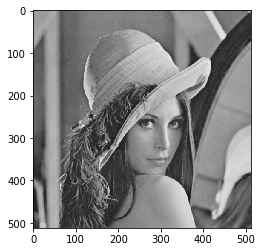

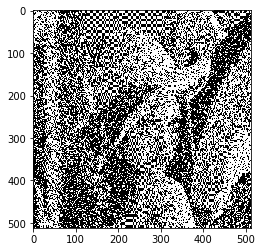

In [4]:
img = cv2.imread('lena512.pgm',0)
#Meios-tons por difusão de erro
newImg = np.zeros(img.shape);
[M, N] = img.shape

plt.imshow(img, cmap = 'gray', clim=(0, 255))
plt.show()

for y in range(1, N):
    for x in range (1, M):
        
        # Se f[x,y] < 128, g[x,y] = 0; senão g[x,y] = 1
        if (img[x, y] < 128):
            newImg[x, y] = 0
        else:
            newImg[x, y] = 1
        
        #Calcular o erro
        erro = img[x, y] - newImg[x, y]*255
        
        #Distribuir o erro aos pixels adjacentes
        if (x < M - 1):
            img[x + 1, y] = img[x + 1, y] + (erro*(7.0/16.0))
        
        if (x > 0 and y < N - 1):
            img[x - 1,y + 1] = img[x - 1, y + 1] + (erro*(3.0/16.0))
        
        if (y < N - 1):
            img[x, y + 1] = img[x, y + 1] + (erro*(5.0/16.0))
        
        if ((x < M - 1) and (y < N - 1)):
            img[x + 1, y + 1] = img[x + 1, y + 1] + (erro*(1.0/16.0))

plt.imshow(newImg, cmap = 'gray', clim=(0,1))
plt.show()
w = cv2.imwrite('lena-dith-errro-propag.pgm', newImg*255)